In [1]:
%matplotlib inline

In [15]:
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Drewry-data-with-chemotype.csv')

In [4]:
df

,Chemotype,AAK1,ABL1-nonphosphorylated,ABL1-phosphorylated,ABL2,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,...,YANK3,YES,YSK1,YSK4,ZAK,ZAP70,p38-alpha,p38-beta,p38-delta,p38-gamma
0,morpholino-triazolo-pyrimidinones,14.0,28.0,20.0,5.0,0.0,0.0,0.0,0.0,9.0,...,0.0,9.0,0.0,0.0,12.0,10.0,0.0,8.0,4.0,23.0
1,4-amino-3-aryl-thienopyridine and analogues,0.0,99.7,89.0,81.0,7.0,9.0,0.0,0.0,0.0,...,0.0,55.0,6.0,43.0,59.0,0.0,8.0,1.0,0.0,14.0
2,4-pyrimidinyl_ortho-aryl_azoles,0.0,8.0,15.0,5.0,18.0,0.0,0.0,0.0,0.0,...,3.0,36.0,0.0,16.0,15.0,22.0,2.0,6.0,0.0,43.0
3,4-pyrimidinyl_ortho-aryl_azoles,0.0,28.0,18.0,100.0,17.0,15.0,7.0,27.0,7.0,...,0.0,36.0,1.0,0.0,66.0,0.0,21.0,90.0,11.0,24.0
4,diarylurea,26.0,49.0,23.0,3.0,10.0,85.0,2.0,0.0,0.0,...,0.0,10.0,0.0,0.0,39.0,0.0,10.0,57.0,0.0,46.0
5,6-aminopurines and related,0.0,33.0,35.0,12.0,7.0,0.0,0.0,0.0,8.0,...,0.0,21.0,0.0,5.0,12.0,3.0,5.0,4.0,0.0,49.0
6,4-anilinoquinoline,10.0,100.0,99.9,100.0,99.4,79.0,18.0,94.7,90.3,...,0.0,99.8,0.0,13.0,75.0,0.0,15.0,6.0,0.0,18.0
7,4-anilinoquinoline,0.0,21.0,7.0,14.0,11.0,0.0,0.0,0.0,0.0,...,0.0,23.0,0.0,0.0,10.0,0.0,8.0,0.0,7.0,31.0
8,2-aryl-4-anilino(pyridin-4-yl)-quinazoline and...,0.0,19.0,14.0,3.0,0.0,100.0,0.0,0.0,0.0,...,59.0,13.0,0.0,19.0,0.0,31.0,0.0,32.0,0.0,50.0
9,benzimidazole_N-thiophenes,0.0,0.0,13.0,14.0,51.0,0.0,0.0,0.0,4.0,...,0.0,28.0,0.0,57.0,0.0,17.0,1.0,1.0,0.0,24.0


In [5]:
Chemotype= df.pop("Chemotype")

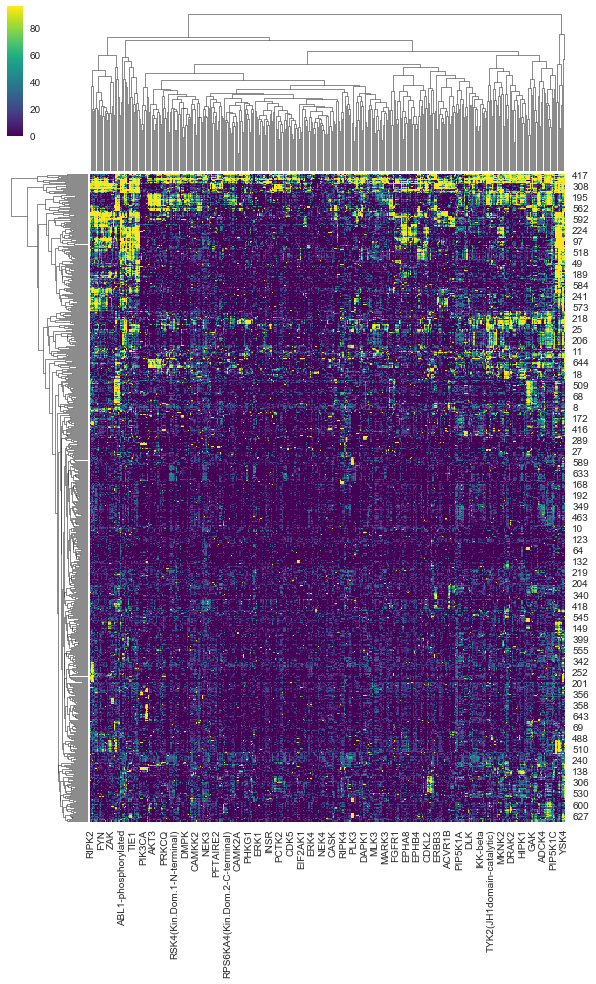

In [6]:
g = sns.clustermap(df,cmap="viridis",method="complete",robust=True,figsize=(10, 15))

In [7]:
colors = matplotlib.cm.jet(np.linspace(0, 1, len(Chemotype.unique())))

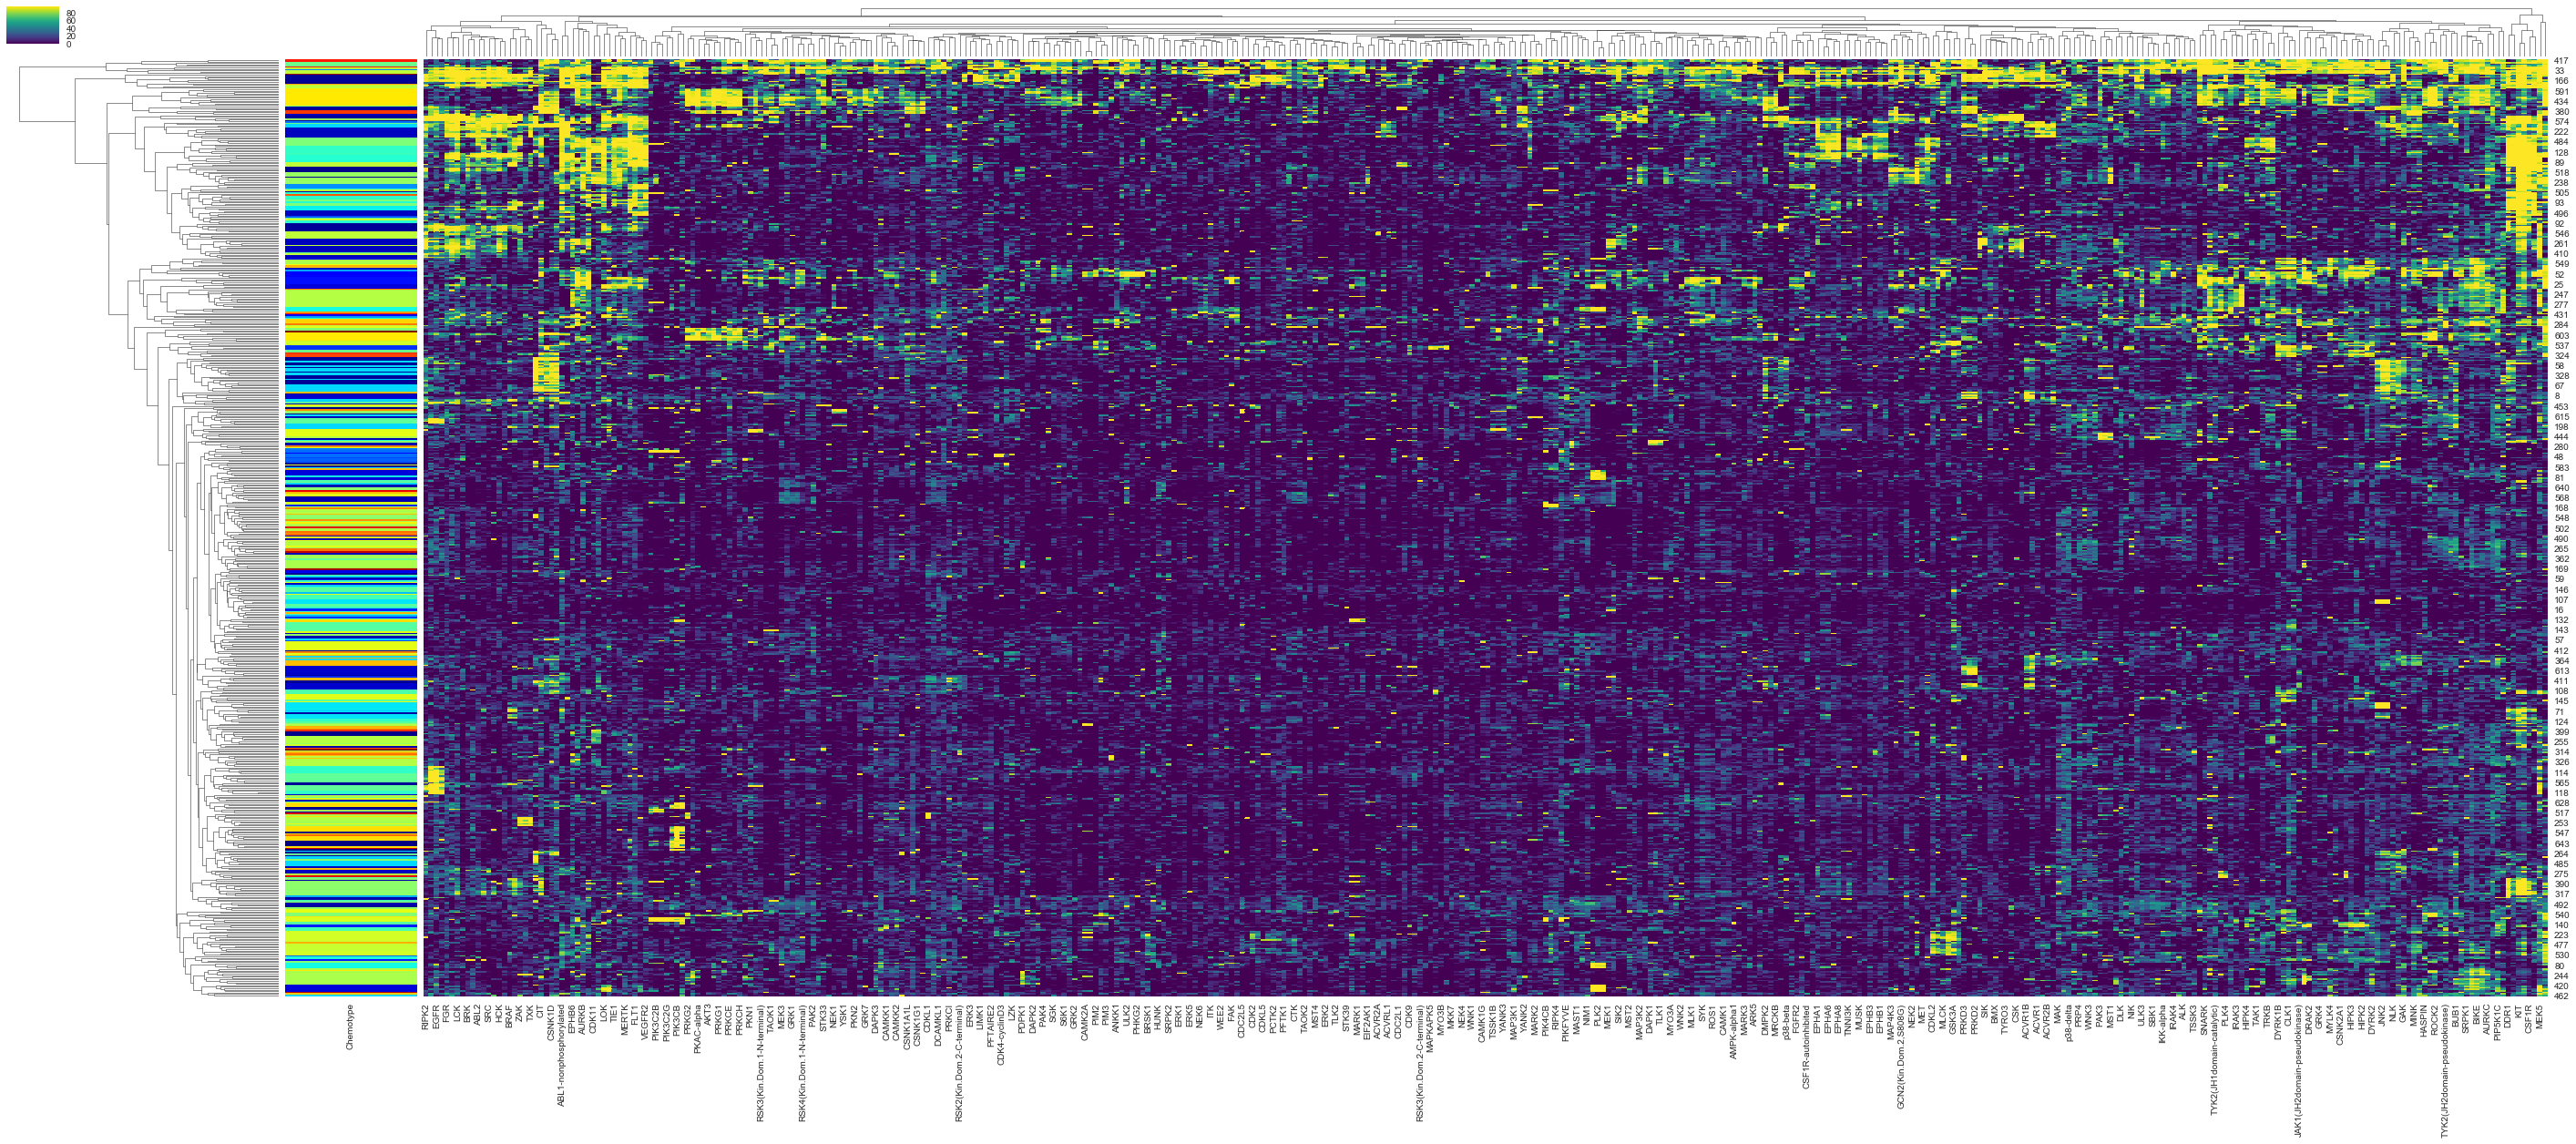

In [8]:
lut = dict(zip(Chemotype.unique(), colors))
row_colors = Chemotype.map(lut)
g = sns.clustermap(df,cmap="viridis",method="complete",row_colors=row_colors,robust=True,figsize=(50, 20))
g.savefig('SNS_heatmap.pdf')

In [11]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [12]:
df_t = df.transpose()

In [13]:
K = linkage(df_t,'complete')

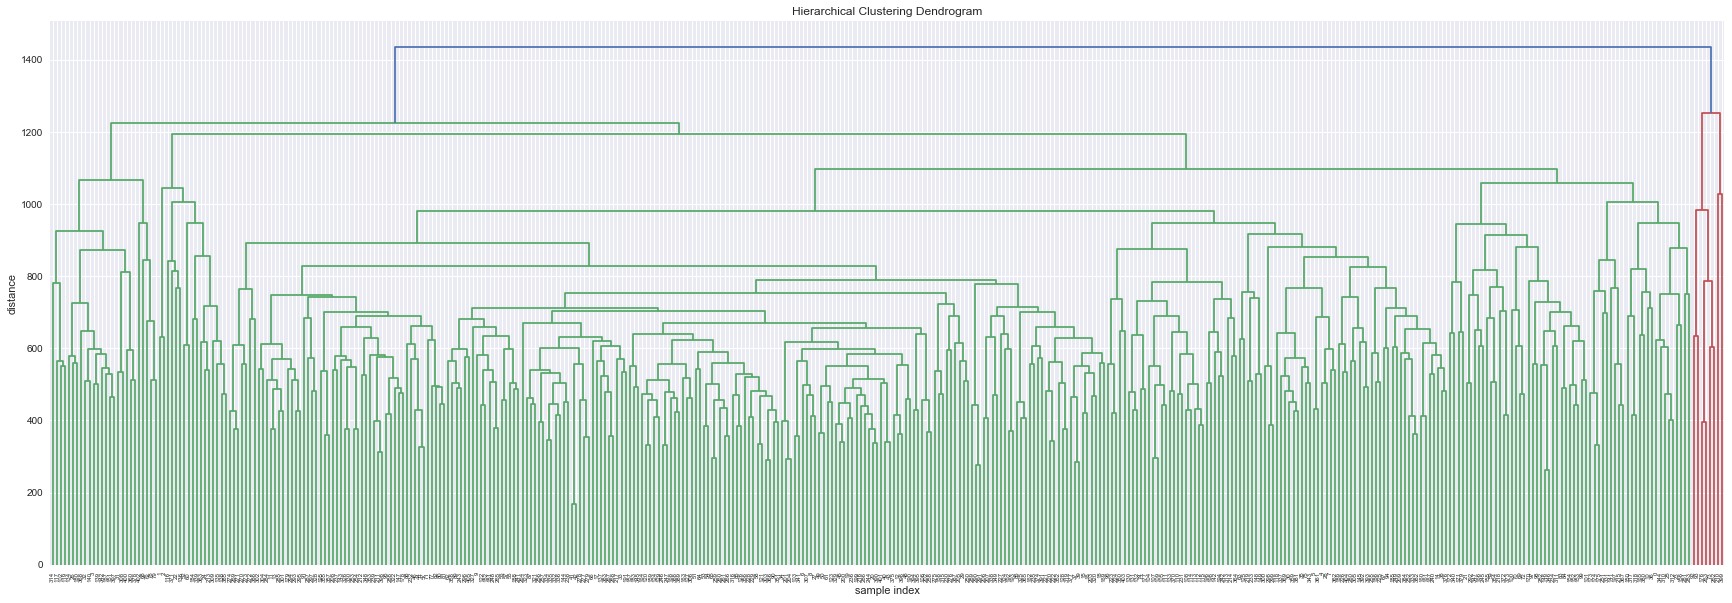

In [16]:
plt.figure(figsize=(30, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
Dend = dendrogram(
    K,
    color_threshold=1400,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=6.,  # font size for the x axis labels
);

In [22]:
#Here we pick the red branch as that of interest
ordered_labels = Dend['ivl']
color_ind = [i for i, c in zip(Dend['ivl'], Dend['color_list']) if c=='r']
first_label_index = ordered_labels.index(color_ind[1])
myInd = []
for i in range(first_label_index,first_label_index+len(color_ind)+1):
    myInd.append(ordered_labels[i])
promiscuous_branch = []
for Ind in myInd:
    print(int(Ind))
    print(df_t.index[int(Ind)])
    promiscuous_branch.append(df_t.index[int(Ind)])

92
DDR1
93
DDR2
176
KIT
263
PDGFRB
73
CSF1R
262
PDGFRA
210
MEK5
399
YSK4
